<a href="https://colab.research.google.com/github/TheScienceUniverse/Agro_GIS/blob/master/Agro_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Full GitHub Repository Here
!pwd
!ls
!rm -rf Agro_GIS
!git clone https://github.com/TheScienceUniverse/Agro_GIS.git

/content
sample_data
Cloning into 'Agro_GIS'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 87 (delta 39), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [0]:
# importing csv module
import csv

# csv File NAME
f_name = "Agro_GIS/data/agro.csv"

# initializing the titles and rows list
fields = []
rows = []

# reading CSV File
with open(f_name, 'r') as f_csv:
	# creating a CSV Reader object
	r_csv = csv.reader(f_csv)
	# Line COUNT
	l_count = 0
	# read row-by-row
	for row in r_csv:
		# print(row)
		l_count += 1
	print("Total Number of Rows: ", l_count)
f_csv.close()

In [0]:
!sh Agro_GIS/setup.sh

In [0]:
import numpy as p_nm
import scipy as p_sc
import matplotlib as p_mp

import cv2 as p_cv

print("Done")

Done


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

"""
m = Basemap(projection="mill", \
           llcrnrlat=-90, urcrnrlat=90, \
           llcrnrlon=-180, urcrnrlon=180,\
           resolution='c')

m.drawcoastlines()
m.fillcontinents()

m.drawmapboundary()
plt.title('Quick basemap example!')
plt.show()
"""

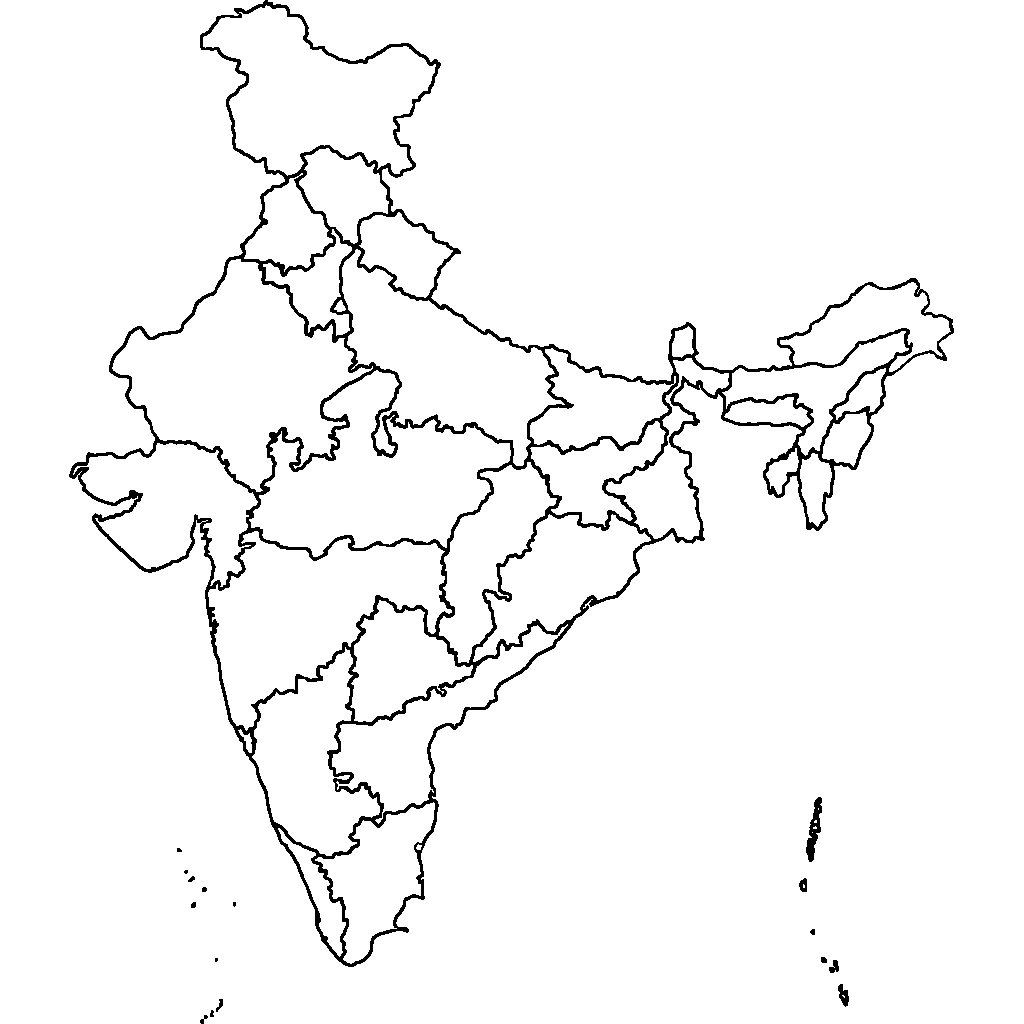

In [0]:
from IPython.display import Image
Image('./Agro_GIS/img/india.jpg', width=500, height=500)

1024 1024 3


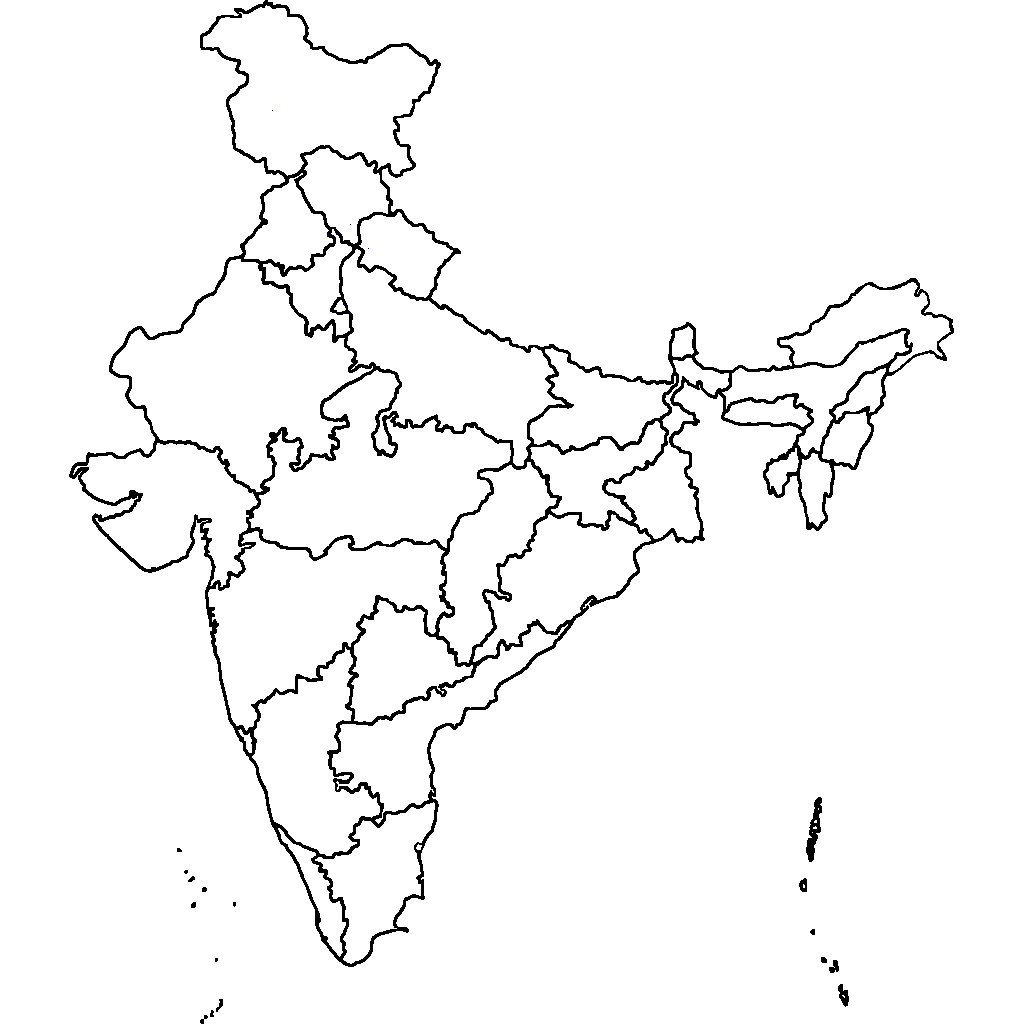

In [7]:
import sys as p_ss
import numpy as p_np
import cv2 as p_cv
from matplotlib import pyplot as p_pt

img = p_cv.imread('Agro_GIS/img/india.jpg', 1)
ih, iw, ic = img.shape
print(ih, iw, ic)

C = [[110, 272], [234, 328], [234, 336], [224, 350], [248, 368], [304, 344]]

# p_pt.imshow(img)
# p_pt.show()

for i in range(len(C)):
	img[C[i][0]][C[i][1]] = [255, 0, 0]
    
ret = p_cv.imwrite('./Agro_GIS/img/output.jpg', img)

from IPython.display import Image
Image('./Agro_GIS/img/output.jpg', width=500, height=500)